In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from oauthlib.uri_validate import query
from sqlalchemy import create_engine
import pyodbc

detailed_meal_df=pd.read_csv('detailed_meals_macros_.csv')
detailed_meal_df

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,...,Dinner Calories,Dinner Protein.1,Dinner Carbohydrates.1,Dinner Fats,Snack Suggestion,Snacks Calories,Snacks Protein,Snacks Carbohydrates,Snacks Fats,Disease
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,...,2020.0,60.0,250.0,60.0,Greek yogurt with fruit,150,10,20,5,Weight Gain
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,...,10.0,5.0,31.0,27.0,Apple with almond butter,180,4,30,8,"Weight Gain, Hypertension, Heart Disease"
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,...,326.0,55.0,150.0,15.0,Trail mix,300,8,34,20,Weight Gain
3,55,Female,160,70,Very Active,Omnivore,2500,140,175.0,28.0,...,278.0,20.0,163.0,27.0,Banana with peanut butter,210,5,30,9,Weight Gain
4,62,Male,170,85,Sedentary,Vegetarian,2000,80,125.0,16.0,...,186.0,6.3,186.0,22.0,Fruit and nut mix,250,6,28,15,Weight Gain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,53,Female,182,76,Sedentary,Vegan,1265,94,63.0,18.8,...,687.0,42.0,126.0,25.0,Apple with almond butter,180,4,30,8,"Diabetes, Acne, Weight Gain, Hypertension, Hea..."
1694,38,Male,150,76,Very Active,Vegan,2109,158,105.0,31.6,...,570.0,43.0,58.0,13.0,Apple with almond butter,180,4,30,8,Weight Gain
1695,57,Male,165,73,Very Active,Vegan,2555,191,127.5,38.2,...,521.0,60.0,54.0,23.0,Fruit and nut mix,250,6,28,15,Weight Gain
1696,40,Male,166,91,Extremely Active,Vegan,3329,249,166.0,49.8,...,80.0,28.0,42.0,26.0,Banana with peanut butter,210,5,30,9,Weight Gain


In [301]:
detailed_meal_df.isnull().sum()

Ages                       0
Gender                     0
Height                     0
Weight                     0
Activity Level             0
Dietary Preference         0
Daily Calorie Target       0
Protein                    0
Sugar                      0
Sodium                     0
Calories                   0
Carbohydrates              0
Fiber                      0
Fat                        0
Breakfast Suggestion       0
Breakfast Calories         0
Breakfast Protein          0
Breakfast Carbohydrates    1
Breakfast Fats             0
Lunch Suggestion           0
Lunch Calories             0
Lunch Protein              0
Lunch Carbohydrates        0
Lunch Fats                 0
Dinner Suggestion          0
Dinner Calories            0
Dinner Protein.1           0
Dinner Carbohydrates.1     0
Dinner Fats                0
Snack Suggestion           0
Snacks Calories            0
Snacks Protein             0
Snacks Carbohydrates       0
Snacks Fats                0
Disease       

In [302]:
detailed_meal_df.describe() 


,Ages,Height,Weight,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,...,Lunch Carbohydrates,Lunch Fats,Dinner Calories,Dinner Protein.1,Dinner Carbohydrates.1,Dinner Fats,Snacks Calories,Snacks Protein,Snacks Carbohydrates,Snacks Fats
count,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,...,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000
mean,43.961720,174.130153,78.064193,2275.171967,139.898115,126.192580,27.979623,2196.440518,252.385159,30.286219,...,68.378987,10.422261,591.772744,43.717686,124.353144,43.347014,177.815077,5.654888,22.713781,9.373969
std,15.915002,13.420936,16.949264,558.812405,53.326588,34.938902,10.665318,571.089569,69.877804,8.385337,...,85.037711,2.279813,455.185433,119.905019,198.381181,90.984707,104.013150,4.084390,12.712006,7.032106
min,18.000000,150.000000,48.000000,1200.000000,50.000000,60.000000,10.000000,990.000000,120.000000,14.400000,...,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,163.250000,64.000000,1800.000000,100.000000,100.000000,20.000000,1770.250000,200.000000,24.000000,...,25.000000,9.000000,302.250000,13.612500,31.000000,18.000000,150.000000,4.000000,20.000000,5.000000
50%,42.000000,174.000000,78.000000,2200.000000,136.000000,124.000000,27.200000,2146.000000,248.000000,29.760000,...,42.000000,10.000000,486.000000,28.000000,60.050000,31.000000,180.000000,6.000000,30.000000,8.000000
75%,57.000000,185.000000,91.000000,2689.000000,174.000000,150.000000,34.800000,2549.750000,300.000000,36.000000,...,75.000000,12.000000,728.000000,46.425000,138.000000,49.000000,250.000000,8.000000,30.000000,15.000000
max,79.000000,200.000000,119.000000,4364.000000,327.000000,218.000000,65.400000,4357.000000,436.000000,52.320000,...,1286.000000,20.000000,5808.000000,2580.000000,2580.000000,1441.000000,350.000000,20.000000,40.000000,25.000000


In [303]:
detailed_meal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ages                     1698 non-null   int64  
 1   Gender                   1698 non-null   object 
 2   Height                   1698 non-null   int64  
 3   Weight                   1698 non-null   int64  
 4   Activity Level           1698 non-null   object 
 5   Dietary Preference       1698 non-null   object 
 6   Daily Calorie Target     1698 non-null   int64  
 7   Protein                  1698 non-null   int64  
 8   Sugar                    1698 non-null   float64
 9   Sodium                   1698 non-null   float64
 10  Calories                 1698 non-null   int64  
 11  Carbohydrates            1698 non-null   int64  
 12  Fiber                    1698 non-null   float64
 13  Fat                      1698 non-null   int64  
 14  Breakfast Suggestion    

In [304]:
detailed_meal_df.dropna(subset=['Breakfast Carbohydrates'],inplace=True)
detailed_meal_df.isnull().sum().sum()


0

In [305]:
meal_properties_df=detailed_meal_df.loc[:,'Dietary Preference':'Snacks Fats']
meal_properties_df.drop(['Breakfast Suggestion','Lunch Suggestion','Dinner Suggestion','Snack Suggestion'],axis=1,inplace=True)
meal_properties_df

,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,Fat,Breakfast Calories,...,Lunch Carbohydrates,Lunch Fats,Dinner Calories,Dinner Protein.1,Dinner Carbohydrates.1,Dinner Fats,Snacks Calories,Snacks Protein,Snacks Carbohydrates,Snacks Fats
0,Omnivore,2000,120,125.0,24.0,2020,250,30.00,60,320.0,...,26.0,12.0,2020.0,60.00,250.0,60.0,150,10,20,5
1,Vegetarian,1600,80,100.0,16.0,1480,200,24.00,40,189.0,...,9.0,8.0,10.0,5.00,31.0,27.0,180,4,30,8
2,Vegan,2200,100,150.0,20.0,2185,300,36.00,65,226.0,...,32.0,15.0,326.0,55.00,150.0,15.0,300,8,34,20
3,Omnivore,2500,140,175.0,28.0,2680,350,42.00,80,283.0,...,62.0,10.0,278.0,20.00,163.0,27.0,210,5,30,9
4,Vegetarian,2000,80,125.0,16.0,1815,250,30.00,55,133.0,...,47.0,9.0,186.0,6.30,186.0,22.0,250,6,28,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,Vegan,1770,132,88.5,26.4,1767,177,21.24,59,25.0,...,177.0,15.0,177.0,21.84,177.0,59.0,250,6,28,15
1693,Vegan,1265,94,63.0,18.8,1258,126,15.12,42,396.0,...,56.0,9.0,687.0,42.00,126.0,25.0,180,4,30,8
1694,Vegan,2109,158,105.0,31.6,2102,210,25.20,70,325.0,...,11.0,12.0,570.0,43.00,58.0,13.0,180,4,30,8
1695,Vegan,2555,191,127.5,38.2,2549,255,30.60,85,89.0,...,26.2,10.0,521.0,60.00,54.0,23.0,250,6,28,15


In [306]:
food_and_nutrition_df=pd.read_csv('Food_and_Nutrition__.csv')
food_and_nutrition_df

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,Fat,Breakfast Suggestion,Lunch Suggestion,Dinner Suggestion,Snack Suggestion,Disease
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,2020,250,30.00,60,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Salmon with roasted vegetables,Greek yogurt with fruit,Weight Gain
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,1480,200,24.00,40,Tofu scramble with veggies,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Apple with almond butter,"Weight Gain, Hypertension, Heart Disease"
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,2185,300,36.00,65,Tofu and veggie breakfast burrito,Black bean burger on a whole wheat bun,Lentil and vegetable curry,Trail mix,Weight Gain
3,55,Female,160,70,Very Active,Omnivore,2500,140,175.0,28.0,2680,350,42.00,80,Greek yogurt with granola and fruit,Chicken and vegetable stir-fry,Turkey chili with brown rice,Banana with peanut butter,Weight Gain
4,62,Male,170,85,Sedentary,Vegetarian,2000,80,125.0,16.0,1815,250,30.00,55,Scrambled eggs with whole wheat toast and avocado,Quinoa salad with chickpeas and vegetables,Vegetarian chili with cornbread,Fruit and nut mix,Weight Gain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,53,Female,182,76,Sedentary,Vegan,1265,94,63.0,18.8,1258,126,15.12,42,Oatmeal with berries and nuts,Quinoa salad with chickpeas and vegetables,Vegetable stir-fry with brown rice,Apple with almond butter,"Diabetes, Acne, Weight Gain, Hypertension, Hea..."
1694,38,Male,150,76,Very Active,Vegan,2109,158,105.0,31.6,2102,210,25.20,70,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Lentil and vegetable curry,Apple with almond butter,Weight Gain
1695,57,Male,165,73,Very Active,Vegan,2555,191,127.5,38.2,2549,255,30.60,85,Smoothie with protein powder,Chicken and vegetable stir-fry,Vegetable stir-fry with brown rice,Fruit and nut mix,Weight Gain
1696,40,Male,166,91,Extremely Active,Vegan,3329,249,166.0,49.8,3314,332,39.84,110,Scrambled eggs with whole wheat toast,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Banana with peanut butter,Weight Gain


In [307]:
food_and_nutrition_df.isnull().sum().sum()

0

In [308]:
for i in food_and_nutrition_df.columns:
    print(food_and_nutrition_df[i].value_counts())

Ages
25    74
32    67
55    66
28    66
62    62
      ..
72     8
78     5
76     4
74     3
79     3
Name: count, Length: 62, dtype: int64
Gender
Female    862
Male      836
Name: count, dtype: int64
Height
170    107
175     82
160     78
165     76
180     71
185     68
168     67
190     64
178     39
155     38
172     37
169     33
183     32
163     31
153     31
152     30
186     30
193     29
188     29
179     29
157     28
192     28
184     27
156     27
182     27
158     26
196     26
159     26
181     25
197     25
174     24
162     24
151     24
198     24
164     23
166     23
154     22
191     22
187     22
199     22
161     21
195     20
189     20
176     20
177     20
150     19
171     18
173     17
194     16
167     16
200     15
Name: count, dtype: int64
Weight
85     78
75     75
90     71
80     67
95     63
       ..
114     4
106     4
109     4
102     2
48      1
Name: count, Length: 71, dtype: int64
Activity Level
Moderately Active    420
Sedentar

In [309]:
food_and_nutrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ages                  1698 non-null   int64  
 1   Gender                1698 non-null   object 
 2   Height                1698 non-null   int64  
 3   Weight                1698 non-null   int64  
 4   Activity Level        1698 non-null   object 
 5   Dietary Preference    1698 non-null   object 
 6   Daily Calorie Target  1698 non-null   int64  
 7   Protein               1698 non-null   int64  
 8   Sugar                 1698 non-null   float64
 9   Sodium                1698 non-null   float64
 10  Calories              1698 non-null   int64  
 11  Carbohydrates         1698 non-null   int64  
 12  Fiber                 1698 non-null   float64
 13  Fat                   1698 non-null   int64  
 14  Breakfast Suggestion  1698 non-null   object 
 15  Lunch Suggestion     

In [310]:
food_and_nutrition_df['BMI']=food_and_nutrition_df['Weight']*100*100/(food_and_nutrition_df['Height']*food_and_nutrition_df['Height'])
food_and_nutrition_df

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,Fat,Breakfast Suggestion,Lunch Suggestion,Dinner Suggestion,Snack Suggestion,Disease,BMI
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,2020,250,30.00,60,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Salmon with roasted vegetables,Greek yogurt with fruit,Weight Gain,24.691358
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,1480,200,24.00,40,Tofu scramble with veggies,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Apple with almond butter,"Weight Gain, Hypertension, Heart Disease",23.875115
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,2185,300,36.00,65,Tofu and veggie breakfast burrito,Black bean burger on a whole wheat bun,Lentil and vegetable curry,Trail mix,Weight Gain,31.020408
3,55,Female,160,70,Very Active,Omnivore,2500,140,175.0,28.0,2680,350,42.00,80,Greek yogurt with granola and fruit,Chicken and vegetable stir-fry,Turkey chili with brown rice,Banana with peanut butter,Weight Gain,27.343750
4,62,Male,170,85,Sedentary,Vegetarian,2000,80,125.0,16.0,1815,250,30.00,55,Scrambled eggs with whole wheat toast and avocado,Quinoa salad with chickpeas and vegetables,Vegetarian chili with cornbread,Fruit and nut mix,Weight Gain,29.411765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,53,Female,182,76,Sedentary,Vegan,1265,94,63.0,18.8,1258,126,15.12,42,Oatmeal with berries and nuts,Quinoa salad with chickpeas and vegetables,Vegetable stir-fry with brown rice,Apple with almond butter,"Diabetes, Acne, Weight Gain, Hypertension, Hea...",22.944089
1694,38,Male,150,76,Very Active,Vegan,2109,158,105.0,31.6,2102,210,25.20,70,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Lentil and vegetable curry,Apple with almond butter,Weight Gain,33.777778
1695,57,Male,165,73,Very Active,Vegan,2555,191,127.5,38.2,2549,255,30.60,85,Smoothie with protein powder,Chicken and vegetable stir-fry,Vegetable stir-fry with brown rice,Fruit and nut mix,Weight Gain,26.813590
1696,40,Male,166,91,Extremely Active,Vegan,3329,249,166.0,49.8,3314,332,39.84,110,Scrambled eggs with whole wheat toast,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Banana with peanut butter,Weight Gain,33.023661


In [311]:
food_and_nutrition_df.dtypes

Ages                      int64
Gender                   object
Height                    int64
Weight                    int64
Activity Level           object
Dietary Preference       object
Daily Calorie Target      int64
Protein                   int64
Sugar                   float64
Sodium                  float64
Calories                  int64
Carbohydrates             int64
Fiber                   float64
Fat                       int64
Breakfast Suggestion     object
Lunch Suggestion         object
Dinner Suggestion        object
Snack Suggestion         object
Disease                  object
BMI                     float64
dtype: object

In [312]:
for index,data in food_and_nutrition_df['BMI'].items():
    if data<18.5 and food_and_nutrition_df.at[index,'Disease']=='Weight Gain':
        food_and_nutrition_df.at[index,'Disease']='Under weight'
        detailed_meal_df.at[index,'Disease']='Under weight'
        
    elif data<=24.9 and food_and_nutrition_df.at[index,'Disease']=='Weight Gain':   
         food_and_nutrition_df.at[index,'Disease']='Normal weight'
         detailed_meal_df.at[index,'Disease']='Normal weight'


    elif data <=24.9 and 'Weight Gain' in food_and_nutrition_df.at[index, 'Disease']:
         food_and_nutrition_df.at[index, 'Disease'] = food_and_nutrition_df.at[index, 'Disease'].replace('Weight Gain, ', '').strip()
         detailed_meal_df.at[index, 'Disease'] = detailed_meal_df.at[index, 'Disease'].replace('Weight Gain, ', '').strip()
       

In [313]:
food_and_nutrition_df

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,Fat,Breakfast Suggestion,Lunch Suggestion,Dinner Suggestion,Snack Suggestion,Disease,BMI
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,2020,250,30.00,60,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Salmon with roasted vegetables,Greek yogurt with fruit,Normal weight,24.691358
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,1480,200,24.00,40,Tofu scramble with veggies,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Apple with almond butter,"Hypertension, Heart Disease",23.875115
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,2185,300,36.00,65,Tofu and veggie breakfast burrito,Black bean burger on a whole wheat bun,Lentil and vegetable curry,Trail mix,Weight Gain,31.020408
3,55,Female,160,70,Very Active,Omnivore,2500,140,175.0,28.0,2680,350,42.00,80,Greek yogurt with granola and fruit,Chicken and vegetable stir-fry,Turkey chili with brown rice,Banana with peanut butter,Weight Gain,27.343750
4,62,Male,170,85,Sedentary,Vegetarian,2000,80,125.0,16.0,1815,250,30.00,55,Scrambled eggs with whole wheat toast and avocado,Quinoa salad with chickpeas and vegetables,Vegetarian chili with cornbread,Fruit and nut mix,Weight Gain,29.411765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,53,Female,182,76,Sedentary,Vegan,1265,94,63.0,18.8,1258,126,15.12,42,Oatmeal with berries and nuts,Quinoa salad with chickpeas and vegetables,Vegetable stir-fry with brown rice,Apple with almond butter,"Diabetes, Acne, Hypertension, Heart Disease",22.944089
1694,38,Male,150,76,Very Active,Vegan,2109,158,105.0,31.6,2102,210,25.20,70,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Lentil and vegetable curry,Apple with almond butter,Weight Gain,33.777778
1695,57,Male,165,73,Very Active,Vegan,2555,191,127.5,38.2,2549,255,30.60,85,Smoothie with protein powder,Chicken and vegetable stir-fry,Vegetable stir-fry with brown rice,Fruit and nut mix,Weight Gain,26.813590
1696,40,Male,166,91,Extremely Active,Vegan,3329,249,166.0,49.8,3314,332,39.84,110,Scrambled eggs with whole wheat toast,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Banana with peanut butter,Weight Gain,33.023661


In [314]:
detailed_meal_df

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,...,Dinner Calories,Dinner Protein.1,Dinner Carbohydrates.1,Dinner Fats,Snack Suggestion,Snacks Calories,Snacks Protein,Snacks Carbohydrates,Snacks Fats,Disease
0,25.0,Male,180.0,80.0,Moderately Active,Omnivore,2000.0,120.0,125.0,24.0,...,2020.0,60.0,250.0,60.0,Greek yogurt with fruit,150.0,10.0,20.0,5.0,Normal weight
1,32.0,Female,165.0,65.0,Lightly Active,Vegetarian,1600.0,80.0,100.0,16.0,...,10.0,5.0,31.0,27.0,Apple with almond butter,180.0,4.0,30.0,8.0,"Hypertension, Heart Disease"
2,48.0,Male,175.0,95.0,Sedentary,Vegan,2200.0,100.0,150.0,20.0,...,326.0,55.0,150.0,15.0,Trail mix,300.0,8.0,34.0,20.0,Weight Gain
3,55.0,Female,160.0,70.0,Very Active,Omnivore,2500.0,140.0,175.0,28.0,...,278.0,20.0,163.0,27.0,Banana with peanut butter,210.0,5.0,30.0,9.0,Weight Gain
4,62.0,Male,170.0,85.0,Sedentary,Vegetarian,2000.0,80.0,125.0,16.0,...,186.0,6.3,186.0,22.0,Fruit and nut mix,250.0,6.0,28.0,15.0,Weight Gain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,53.0,Female,182.0,76.0,Sedentary,Vegan,1265.0,94.0,63.0,18.8,...,687.0,42.0,126.0,25.0,Apple with almond butter,180.0,4.0,30.0,8.0,"Diabetes, Acne, Hypertension, Heart Disease"
1694,38.0,Male,150.0,76.0,Very Active,Vegan,2109.0,158.0,105.0,31.6,...,570.0,43.0,58.0,13.0,Apple with almond butter,180.0,4.0,30.0,8.0,Weight Gain
1695,57.0,Male,165.0,73.0,Very Active,Vegan,2555.0,191.0,127.5,38.2,...,521.0,60.0,54.0,23.0,Fruit and nut mix,250.0,6.0,28.0,15.0,Weight Gain
1696,40.0,Male,166.0,91.0,Extremely Active,Vegan,3329.0,249.0,166.0,49.8,...,80.0,28.0,42.0,26.0,Banana with peanut butter,210.0,5.0,30.0,9.0,Weight Gain


In [315]:
dataframe_for_normal_people = food_and_nutrition_df[(food_and_nutrition_df['BMI'] <= 24.9) & (food_and_nutrition_df['BMI'] >= 18.5)]
dataframe_for_normal_people

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,Fat,Breakfast Suggestion,Lunch Suggestion,Dinner Suggestion,Snack Suggestion,Disease,BMI
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,2020,250,30.00,60,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Salmon with roasted vegetables,Greek yogurt with fruit,Normal weight,24.691358
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,1480,200,24.00,40,Tofu scramble with veggies,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Apple with almond butter,"Hypertension, Heart Disease",23.875115
10,25,Male,180,80,Lightly Active,Omnivore,2000,120,125.0,24.0,2020,250,30.00,60,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Salmon with roasted vegetables,Greek yogurt with fruit,Normal weight,24.691358
11,32,Female,165,65,Moderately Active,Vegan,2200,100,150.0,20.0,2230,300,36.00,70,Tofu scramble with vegetables,Lentil soup with wholegrain bread,Chickpea and vegetable curry,Trail mix with nuts and seeds,Normal weight,23.875115
15,28,Female,172,60,Lightly Active,Vegan,2000,100,125.0,20.0,1940,250,30.00,60,Tofu scramble with vegetables,Black bean burger on a wholegrain bun,Lentil pasta with vegetables,Trail mix with nuts and seeds,Normal weight,20.281233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,45,Male,157,53,Moderately Active,Vegetarian,2001,150,100.0,30.0,1994,200,24.00,66,Tofu scramble with veggies,Lentil soup with whole wheat bread,Lentil and vegetable curry,Apple with almond butter,Normal weight,21.501886
1689,67,Male,179,69,Very Active,Vegetarian,2550,191,127.5,38.2,2549,255,30.60,85,Oatmeal with berries and nuts,Lentil soup with whole wheat bread,Lentil and vegetable curry,Banana with peanut butter,Normal weight,21.534908
1692,50,Male,176,62,Sedentary,Vegan,1770,132,88.5,26.4,1767,177,21.24,59,Tofu scramble with veggies,Black bean burger on a whole wheat bun,Vegetable stir-fry with brown rice,Fruit and nut mix,Normal weight,20.015496
1693,53,Female,182,76,Sedentary,Vegan,1265,94,63.0,18.8,1258,126,15.12,42,Oatmeal with berries and nuts,Quinoa salad with chickpeas and vegetables,Vegetable stir-fry with brown rice,Apple with almond butter,"Diabetes, Acne, Hypertension, Heart Disease",22.944089


In [316]:
print("Unique Values :")
print(food_and_nutrition_df.nunique())

Unique Values :
Ages                      62
Gender                     2
Height                    51
Weight                    71
Activity Level             5
Dietary Preference         4
Daily Calorie Target     895
Protein                  231
Sugar                    276
Sodium                   231
Calories                 759
Carbohydrates            276
Fiber                    276
Fat                      103
Breakfast Suggestion     121
Lunch Suggestion         190
Dinner Suggestion        177
Snack Suggestion         112
Disease                   16
BMI                     1063
dtype: int64


# So final tables we have : 
# 1- normal weight table 2-meal properties 3- food and nutrition data
# now pass the data to SQL server

In [332]:
con_str = (
    r'DRIVER={ODBC Driver 17 for SQL Server};'
    r'SERVER=SH;'      
    r'DATABASE=Nutrition;'
    r'Trusted_Connection=yes;'       
)
engine=create_engine(f"mssql+pyodbc:///?odbc_connect={con_str}")


In [333]:
food_and_nutrition_df.to_sql('Food_and_Nutrition', con=engine, if_exists='replace',index=False)
meal_properties_df.to_sql('Meal Properties', con=engine, if_exists='replace',index=False)
dataframe_for_normal_people.to_sql('Normal People Weights', con=engine, if_exists='replace',index=False)


83

In [335]:
query="""
-- we want to know dail calaorie target for people of over weight and compare it with normal people 
SELECT DISTINCT 
FOOD.Weight as "Over weights ", FOOD.Height as "Heights for over weight",
FOOD.[Dietary Preference] as "Dietary Preference for both weight categories",
FOOD.[Daily Calorie Target] as "Daily Calorie Target for over weight people" 
,normal.Weight as "Normal weight",
normal.[Height] as "Normal Height" 
,normal.[Daily Calorie Target] as "Daily Calorie Target for Normal weight people" 
from Food_and_Nutrition AS FOOD
 Join [Normal People Weights] normal
on FOOD.[Dietary Preference]=normal.[Dietary Preference]
where FOOD.BMI>=24.9
order by FOOD.Weight DESC ,normal.Weight DESC
"""
df_query=pd.read_sql_query(query,engine)
df_query

,Over weights,Heights for over weight,Dietary Preference for both weight categories,Daily Calorie Target for over weight people,Normal weight,Normal Height,Daily Calorie Target for Normal weight people
0,119,155,Vegan,2801,98,199,2815
1,119,187,Vegan,2817,98,199,2815
2,119,190,Vegan,2887,98,199,2815
3,119,173,Omnivore,2527,97,199,2722
4,119,189,Omnivore,2188,97,199,2722
...,...,...,...,...,...,...,...
126449,57,151,Omnivore,1410,50,152,2843
126450,57,151,Omnivore,1410,50,154,2323
126451,57,151,Omnivore,1410,50,157,1200
126452,57,151,Omnivore,1410,50,157,2633


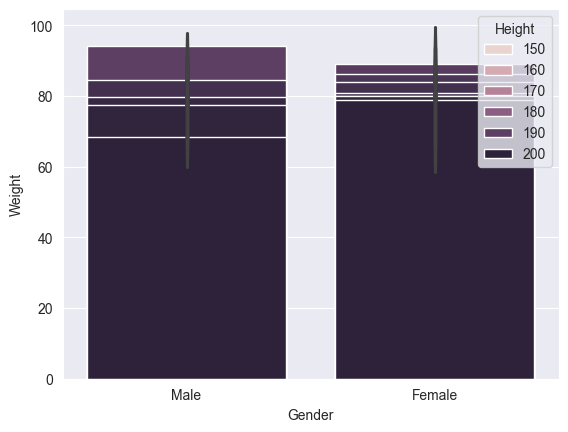

In [318]:
#1-gender ,height and weight relationship
custom_palette = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2']
sns.barplot(x='Gender', y='Weight',hue='Height', data=food_and_nutrition_df,dodge=False)
plt.show()

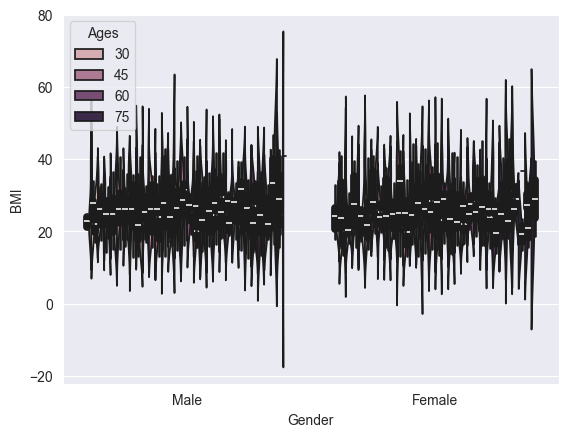

In [319]:
sns.violinplot(x='Gender', y='BMI', hue='Ages', data=food_and_nutrition_df, split=True)
plt.show()


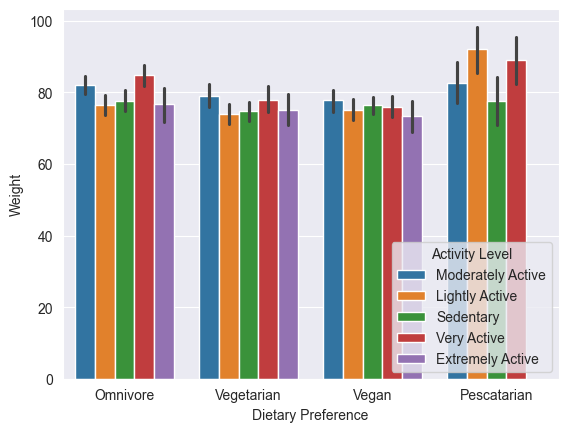

In [320]:
# 2- weight ,Dietary Preference and Activity Level
sns.barplot(y='Weight',x='Dietary Preference', hue='Activity Level', data=food_and_nutrition_df)
plt.show()

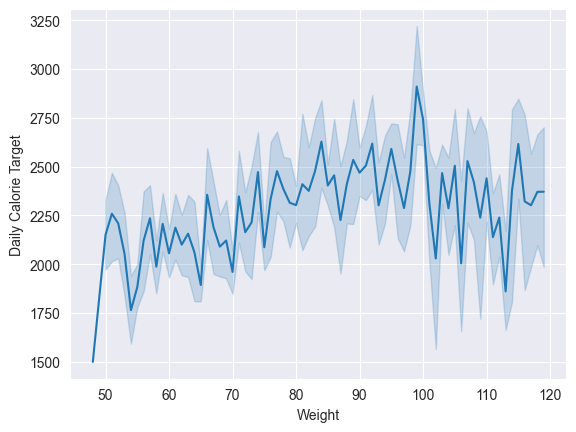

In [321]:
# 3- weight,protein and Daily Calorie Target
sns.lineplot(y='Daily Calorie Target',x='Weight', data=food_and_nutrition_df)
plt.show()

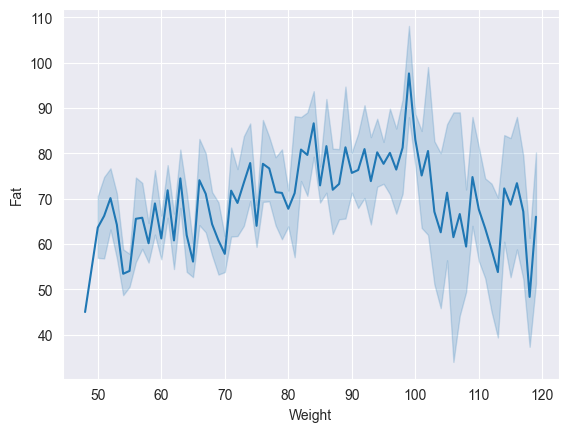

In [322]:
# 4- weight ,height and fat
sns.lineplot(x='Weight',y='Fat', data=food_and_nutrition_df)
plt.show()

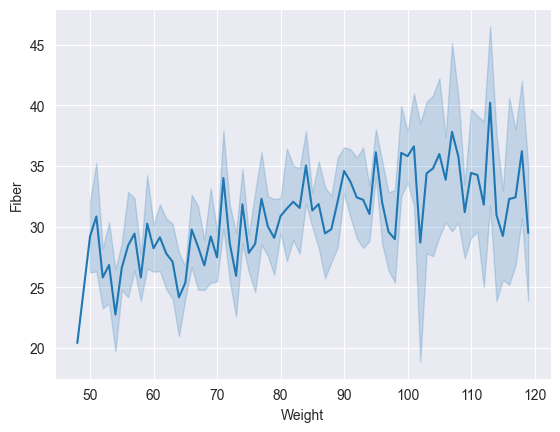

In [323]:
# 5-weight,fiber and Breakfast Suggestion
sns.lineplot(y='Fiber',x='Weight',data=food_and_nutrition_df)
plt.show()

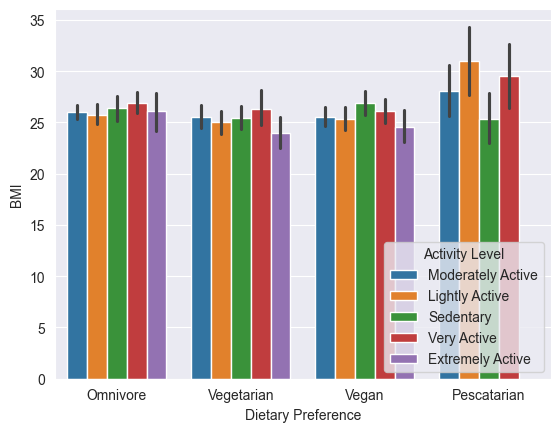

In [324]:
#6-BMI and Dietary Preference
sns.barplot(y='BMI',x='Dietary Preference',hue='Activity Level',data=food_and_nutrition_df)
plt.show()

In [337]:
food_and_nutrition_df.to_excel('food_and_nutrition.xlsx')
#dataframe_for_normal_people.to_excel('normal_people_weights.xlsx')
#meal_properties_df.to_excel('meal_properties.xlsx')